In [2]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [3]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [14]:
from sklearn.model_selection import GridSearchCV

model_name = 'KNN'

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [15]:
# 3. Huấn luyện
best_model_knn = KNeighborsClassifier(**best_params)
print(f"Đang huấn luyện {model_name}...")
best_model_knn.fit(X_train, y_train)

# 4. Dự đoán và Đánh giá
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy: {classification_report(y_test, y_pred, output_dict=True)["accuracy"]:.4f}')

Đang huấn luyện KNN...

Độ chính xác (Accuracy) của KNN: 96.43%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.75      0.75      0.75         4

    accuracy                           0.96        56
   macro avg       0.87      0.87      0.87        56
weighted avg       0.96      0.96      0.96        56

------------------------------
F1_Score: 0.9643
Accuracy: 0.9643


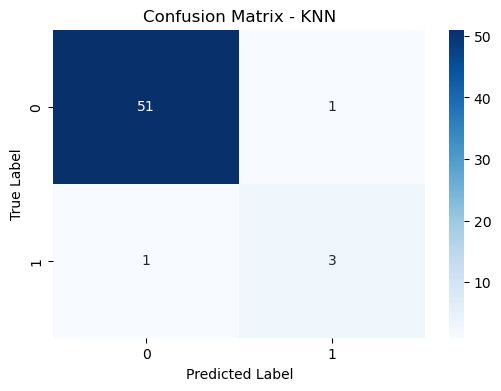

In [7]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()